In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import timeit
import json

pd.set_option('display.max_rows', 60000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

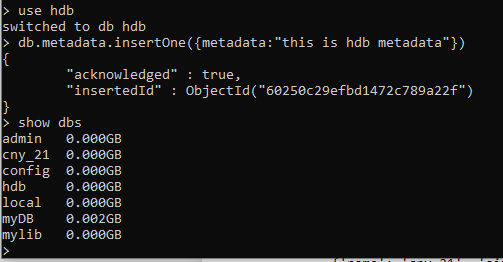

In [2]:
from pymongo import MongoClient

client = MongoClient()

#check your list_db
cursor = client.list_databases()
for db in cursor:
    print(db)

{'name': 'admin', 'sizeOnDisk': 65536.0, 'empty': False}
{'name': 'cny_21', 'sizeOnDisk': 155648.0, 'empty': False}
{'name': 'config', 'sizeOnDisk': 36864.0, 'empty': False}
{'name': 'hdb', 'sizeOnDisk': 40960.0, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728.0, 'empty': False}
{'name': 'myDB', 'sizeOnDisk': 2592768.0, 'empty': False}
{'name': 'mylib', 'sizeOnDisk': 65536.0, 'empty': False}


In [3]:
filename_1 = "datasets/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"
filename_2 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"
filename_3 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"
filename_4 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"

In [4]:
df_1 = pd.read_csv(filename_1,low_memory=False)
df_2 = pd.read_csv(filename_2,low_memory=False)
df_3 = pd.read_csv(filename_3,low_memory=False)
df_4 = pd.read_csv(filename_4,low_memory=False)

df_3 = df_3.drop(['remaining_lease'], axis=1)
df_4 = df_4.drop(['remaining_lease'], axis=1)

records_1 = json.loads(df_1.T.to_json()).values()
records_2 = json.loads(df_2.T.to_json()).values()
records_3 = json.loads(df_3.T.to_json()).values()
records_4 = json.loads(df_4.T.to_json()).values()

set_hdb = ['set_1','set_2','set_3','set_4']
records_hdb = [records_1,records_2,records_3,records_4]

In [5]:
def upload_ (set_,record):
    db = client['hdb']
    collection =db[set_]
    collection.insert_many(record)

In [6]:
for a, b in zip(set_hdb,records_hdb):
    upload_(a,b)

In [14]:
#check
db = client['hdb']
collection =db['set_1']
data_1 = pd.DataFrame(list(collection.find()))
data_1.head()

,_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,60252670aac769b8001aac40,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.00,Improved,1986,"147,000.00"
1,60252670aac769b8001aac41,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.00,Improved,1986,"144,000.00"
2,60252670aac769b8001aac42,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.00,New Generation,1976,"159,000.00"
3,60252670aac769b8001aac43,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.00,New Generation,1976,"167,000.00"
4,60252670aac769b8001aac44,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.00,New Generation,1976,"163,000.00"


In [15]:
data_1.shape #shows that 300k records from the 1st set was loaded 

(369651, 11)

In [19]:
db = client['hdb']
db.list_collection_names()

['set_1', 'set_3', 'set_2', 'metadata', 'set_4']